In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

In [22]:
# load the dataset
salary_ranges = pd.read_csv('data/Salary_Ranges_by_Job_Classification.csv')
salary_ranges.head()

,SetID,Job Code,Eff Date,Sal End Date,Salary SetID,Sal Plan,Grade,Step,Biweekly High Rate,Biweekly Low Rate,Union Code,Extended Step,Pay Type
0,COMMN,0109,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$0.00,$0.00,330,0,C
1,COMMN,0110,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$15.00,$15.00,323,0,D
2,COMMN,0111,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$25.00,$25.00,323,0,D
3,COMMN,0112,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$50.00,$50.00,323,0,D
4,COMMN,0114,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$100.00,$100.00,323,0,M


In [4]:
# review the general information about the dataset
salary_ranges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   SetID               1356 non-null   object
 1   Job Code            1356 non-null   object
 2   Eff Date            1356 non-null   object
 3   Sal End Date        1356 non-null   object
 4   Salary SetID        1356 non-null   object
 5   Sal Plan            1356 non-null   object
 6   Grade               1356 non-null   object
 7   Step                1356 non-null   int64 
 8   Biweekly High Rate  1356 non-null   object
 9   Biweekly Low Rate   1356 non-null   object
 10  Union Code          1356 non-null   int64 
 11  Extended Step       1356 non-null   int64 
 12  Pay Type            1356 non-null   object
dtypes: int64(3), object(10)
memory usage: 137.8+ KB


In [5]:
salary_ranges.isnull().sum()

SetID                 0
Job Code              0
Eff Date              0
Sal End Date          0
Salary SetID          0
Sal Plan              0
Grade                 0
Step                  0
Biweekly High Rate    0
Biweekly Low Rate     0
Union Code            0
Extended Step         0
Pay Type              0
dtype: int64

In [6]:
salary_ranges.describe()

,Step,Union Code,Extended Step
count,1356.000000,1356.000000,1356.000000
mean,1.294985,392.676991,0.150442
std,1.045816,338.100562,1.006734
min,1.000000,1.000000,0.000000
25%,1.000000,21.000000,0.000000
50%,1.000000,351.000000,0.000000
75%,1.000000,790.000000,0.000000
max,5.000000,990.000000,11.000000


In [23]:
salary_ranges = salary_ranges[['Biweekly High Rate', 'Grade']]
salary_ranges.head()

,Biweekly High Rate,Grade
0,$0.00,00000
1,$15.00,00000
2,$25.00,00000
3,$50.00,00000
4,$100.00,00000


In [20]:
salary_ranges.loc[:,'Biweekly High Rate']

0          0.00
1         15.00
2         25.00
3         50.00
4        100.00
         ...   
1351    2145.00
1352    3041.00
1353    3132.00
1354    3453.00
1355    3453.00
Name: Biweekly High Rate, Length: 1356, dtype: object

In [25]:
salary_ranges['Biweekly High Rate'] = salary_ranges.loc[:,'Biweekly High Rate'].map(lambda x: x.replace('$', '')).astype(float)
salary_ranges.head()

,Biweekly High Rate,Grade
0,0.0,00000
1,15.0,00000
2,25.0,00000
3,50.0,00000
4,100.0,00000


In [28]:
salary_ranges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Biweekly High Rate  1356 non-null   float64
 1   Grade               1356 non-null   object 
dtypes: float64(1), object(1)
memory usage: 21.3+ KB


<AxesSubplot:>

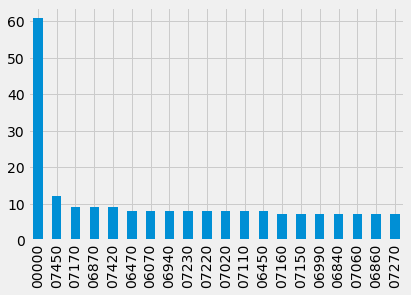

In [35]:
salary_ranges.loc[:,'Grade'].value_counts().head(20).plot(kind='bar')

In [60]:
# load San Fran data
customer = pd.read_csv('data/2013_SFO_Customer_survey.csv')
customer.head()

,RESPNUM,CCGID,RUN,INTDATE,GATE,STRATA,PEAK,METHOD,AIRLINE,FLIGHT,...,Q17_COUNTRY,HOME,Q18_AGE,Q19_SEX,Q20_INCOME,Q21_HIFLYER,Q22A_USESJC,Q22B_USEOAK,LANG,WEIGHT
0,1,1,1215,2,12,1,1,1,21,1437,...,US,1,2,1,1,2,2,1,1,0.553675
1,2,2,1215,2,12,1,1,1,21,1437,...,US,5,6,1,0,3,2,1,1,0.553675
2,3,3,1215,2,12,1,1,1,21,1437,...,US,1,4,2,2,3,2,2,1,0.553675
3,4,4,1215,2,12,1,1,1,21,1437,...,US,90,4,1,2,2,2,2,1,0.553675
4,5,5,1215,2,12,1,1,1,21,1437,...,US,10,3,1,3,1,0,1,1,0.553675


In [53]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3535 entries, 0 to 3534
Data columns (total 95 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RESPNUM          3535 non-null   int64  
 1   CCGID            3535 non-null   object 
 2   RUN              3535 non-null   int64  
 3   INTDATE          3535 non-null   int64  
 4   GATE             3535 non-null   int64  
 5   STRATA           3535 non-null   int64  
 6   PEAK             3535 non-null   int64  
 7   METHOD           3535 non-null   int64  
 8   AIRLINE          3535 non-null   int64  
 9   FLIGHT           3535 non-null   int64  
 10  DEST             3535 non-null   int64  
 11  DESTGEO          3535 non-null   int64  
 12  DESTMARK         3535 non-null   int64  
 13  ARRTIME          3535 non-null   object 
 14  DEPTIME          3535 non-null   object 
 15  Q2PURP1          3535 non-null   int64  
 16  Q2PURP2          3459 non-null   float64
 17  Q2PURP3       

<AxesSubplot:>

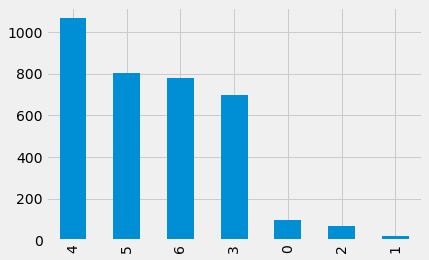

In [40]:
customer.loc[:,'Q7A_ART'].value_counts().plot(kind='bar')

In [41]:
customer.loc[:,'Q7A_ART'].describe()

count    3535.000000
mean        4.300707
std         1.341445
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         6.000000
Name: Q7A_ART, dtype: float64

In [61]:
art_ratings = customer.loc[:,'Q7A_ART']

In [63]:
art_ratings = art_ratings[(art_ratings >=1) & (art_ratings <=5)]
art_ratings.describe()

count    2656.000000
mean        3.964232
std         0.859116
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: Q7A_ART, dtype: float64

In [64]:
art_ratings = art_ratings.astype(str)

In [65]:
art_ratings.describe()

count     2656
unique       5
top        4.0
freq      1066
Name: Q7A_ART, dtype: object

<AxesSubplot:>

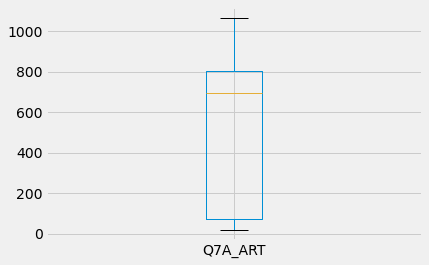

In [67]:
art_ratings.value_counts().plot(kind='box')